In [45]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time
import random
from IPython import display

In [2]:
etchString = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\GPS_GUI_Data_2023-04-26_15_07_28_R.csv'
stadiumString = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\GPS_GUI_Data_2023-05-03_11_22_06_R.csv'
satherString = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\GPS_GUI_Data_2023-04-26_16_24_08_R.csv'
gladeString = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\GPS_GUI_Data_2023-04-26_16_33_51_R.csv'

In [3]:
etchData = pd.read_csv(etchString)
stadiumData = pd.read_csv(stadiumString)
satherData = pd.read_csv(satherString)
gladeData = pd.read_csv(gladeString)

In [4]:
display(etchData)

,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682547e+09,37.875416,-122.258913,38.2
1,1.682547e+09,37.875411,-122.258909,37.6
2,1.682547e+09,37.875411,-122.258906,39.0
3,1.682547e+09,37.875398,-122.258901,35.8
4,1.682547e+09,37.875394,-122.258903,39.4
...,...,...,...,...
162,1.682548e+09,37.875448,-122.258888,34.4
163,1.682548e+09,37.875448,-122.258891,31.8
164,1.682548e+09,37.875446,-122.258895,38.4
165,1.682548e+09,37.875443,-122.258898,34.4


In [5]:
display(stadiumData)

,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.683138e+09,37.871769,-122.252231,39.0
1,1.683138e+09,37.871776,-122.252248,40.0
2,1.683138e+09,37.871719,-122.252271,34.0
3,1.683138e+09,37.871705,-122.252301,34.0
4,1.683138e+09,37.871701,-122.252321,35.4
...,...,...,...,...
158,1.683139e+09,37.871701,-122.252286,30.4
159,1.683139e+09,37.871701,-122.252286,30.0
160,1.683139e+09,37.871701,-122.252286,32.4
161,1.683139e+09,37.871701,-122.252284,36.6


In [6]:
display(satherData)

,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682551e+09,37.870285,-122.259436,37.6
1,1.682551e+09,37.870281,-122.259435,43.2
2,1.682551e+09,37.870276,-122.259433,46.6
3,1.682551e+09,37.870275,-122.259433,41.2
4,1.682551e+09,37.870275,-122.259436,41.4
...,...,...,...,...
155,1.682552e+09,37.870265,-122.259390,42.6
156,1.682552e+09,37.870265,-122.259390,46.0
157,1.682552e+09,37.870265,-122.259390,47.0
158,1.682552e+09,37.870265,-122.259390,48.6


In [7]:
display(gladeData)

,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682552e+09,37.873108,-122.259483,47.6
1,1.682552e+09,37.873100,-122.259483,46.2
2,1.682552e+09,37.873089,-122.259480,48.0
3,1.682552e+09,37.873081,-122.259480,50.0
4,1.682552e+09,37.873078,-122.259480,47.6
...,...,...,...,...
156,1.682553e+09,37.873076,-122.259455,44.6
157,1.682553e+09,37.873076,-122.259455,47.2
158,1.682553e+09,37.873076,-122.259455,46.0
159,1.682553e+09,37.873076,-122.259455,43.4


In [8]:
etchCPS = etchData.loc[:,'Epoch time':'Radiation(cps)']
etchCPS

,Epoch time,Latitude,Longitude,Radiation (cps)
0,1.682547e+09,37.875416,-122.258913,38.2
1,1.682547e+09,37.875411,-122.258909,37.6
2,1.682547e+09,37.875411,-122.258906,39.0
3,1.682547e+09,37.875398,-122.258901,35.8
4,1.682547e+09,37.875394,-122.258903,39.4
...,...,...,...,...
162,1.682548e+09,37.875448,-122.258888,34.4
163,1.682548e+09,37.875448,-122.258891,31.8
164,1.682548e+09,37.875446,-122.258895,38.4
165,1.682548e+09,37.875443,-122.258898,34.4


In [9]:
stadiumCPS = stadiumData.loc[:,'Epoch time':'Radiation(cps)']

In [10]:
satherCPS = satherData.loc[:,'Epoch time':'Radiation(cps)']

In [11]:
gladeCPS = gladeData.loc[:,'Epoch time':'Radiation(cps)']

### MIN/MAX ETCH

In [12]:
print(etchCPS.min())
print('\n',etchCPS.max())

Epoch time         1.682547e+09
Latitude           3.787529e+01
Longitude         -1.222589e+02
Radiation (cps)    2.820000e+01
dtype: float64

 Epoch time         1.682548e+09
Latitude           3.787547e+01
Longitude         -1.222588e+02
Radiation (cps)    4.260000e+01
dtype: float64


In [13]:
print(etchCPS['Radiation (cps)'].mean())

34.78203592814369


### MIN/MAX STADIUM

In [14]:
print(stadiumCPS.min())
print('\n',stadiumCPS.max())

Epoch time         1.683138e+09
Latitude           3.787170e+01
Longitude         -1.222523e+02
Radiation (cps)    2.620000e+01
dtype: float64

 Epoch time         1.683139e+09
Latitude           3.787178e+01
Longitude         -1.222522e+02
Radiation (cps)    4.040000e+01
dtype: float64


In [15]:
print(stadiumCPS['Radiation (cps)'].mean())

33.256441717791404


### MIN/MAX SATHER

In [16]:
print(satherCPS.min())
print('\n',satherCPS.max())

Epoch time         1.682551e+09
Latitude           3.787027e+01
Longitude         -1.222595e+02
Radiation (cps)    3.480000e+01
dtype: float64

 Epoch time         1.682552e+09
Latitude           3.787030e+01
Longitude         -1.222594e+02
Radiation (cps)    5.020000e+01
dtype: float64


In [17]:
print(satherCPS['Radiation (cps)'].mean())

42.79374999999999


### MIN/MAX GLADE

In [18]:
print(gladeCPS.min())
print('\n',gladeCPS.max())

Epoch time         1.682552e+09
Latitude           3.787306e+01
Longitude         -1.222595e+02
Radiation (cps)    3.760000e+01
dtype: float64

 Epoch time         1.682553e+09
Latitude           3.787311e+01
Longitude         -1.222595e+02
Radiation (cps)    5.420000e+01
dtype: float64


In [19]:
print(gladeCPS['Radiation (cps)'].mean())

45.66956521739128


In [20]:
etchMean = etchCPS['Radiation (cps)'].mean()
stadiumMean = stadiumCPS['Radiation (cps)'].mean()
satherMean = satherCPS['Radiation (cps)'].mean()
gladeMean = gladeCPS['Radiation (cps)'].mean()

In [50]:
etchMean

34.78203592814369

In [52]:
etchStd = np.std(etchCPS['Radiation (cps)'])
etchStd

2.801096991892749

In [22]:
stadiumMean

33.256441717791404

In [53]:
stadiumStd = np.std(stadiumCPS['Radiation (cps)'])
stadiumStd

2.8563573870713026

In [23]:
satherMean

42.79374999999999

In [54]:
satherStd = np.std(satherCPS['Radiation (cps)'])
satherStd

3.119569030731649

In [24]:
gladeMean

45.66956521739128

In [55]:
gladeStd = np.std(gladeCPS['Radiation (cps)'])
gladeStd

2.9958365203940636

### Dose Rates

In [39]:
etchCPM = etchMean * 60
etchDoseRate = etchCPM * .0000427
etchDose1= etchDoseRate * (1e-6)
etchActivity = (etchDose1 * 70)/(3600*500*(1.6e-16))
etchActivity

21659.063622754475

In [43]:
stadiumCPM = stadiumMean * 60
stadiumDoseRate = stadiumCPM * .0000427
stadiumDose1 = stadiumDoseRate * (1e-6)
stadiumActivity = (stadiumDose1 * 70)/(3600*500*(1.6e-16))
stadiumActivity

20709.06339468302

In [42]:
satherCPM = satherMean * 60
satherDoseRate = satherCPM * .0000427
satherDose1 = satherDoseRate * (1e-6)
satherActivity = (satherDose1 * 70)/(3600*500*(1.6e-16))
satherActivity

26648.024739583318

In [41]:
gladeCPM = gladeMean * 60
gladeDoseRate = gladeCPM * .0000427
gladeDose1 = gladeDoseRate * (1e-6)
gladeActivity = (gladeDose1 * 70)/(3600*500*(1.6e-16))
gladeActivity

28438.81884057969

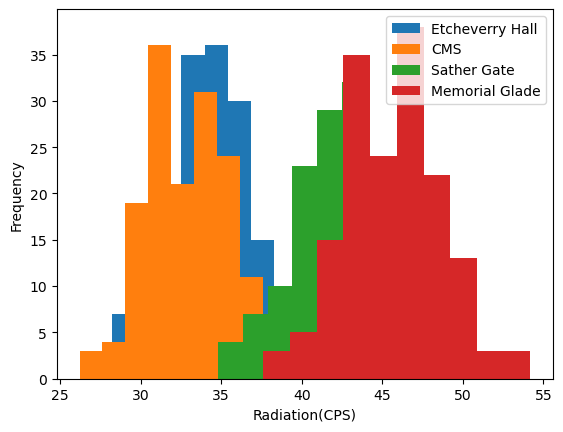

In [49]:
plt.hist(etchCPS['Radiation (cps)'],label = 'Etcheverry Hall')
plt.hist(stadiumCPS['Radiation (cps)'], label = 'CMS')
plt.hist(satherCPS['Radiation (cps)'], label = 'Sather Gate')
plt.hist(gladeCPS['Radiation (cps)'], label = 'Memorial Glade')
plt.ylabel('Frequency')
plt.xlabel('Radiation(CPS)')
plt.legend(loc = 'upper right')
plt.show()